## Phishing Domain Detection

In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Data\dataset_full.csv")

In [3]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [5]:
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,88647.0,0.343903,0.783892,-1.0,0.0,0.0,1.0,17.0
url_google_index,88647.0,0.001410,0.058640,-1.0,0.0,0.0,0.0,1.0
domain_google_index,88647.0,0.002019,0.063250,-1.0,0.0,0.0,0.0,1.0
url_shortened,88647.0,0.005482,0.073841,0.0,0.0,0.0,0.0,1.0


In [7]:
import seaborn as sns

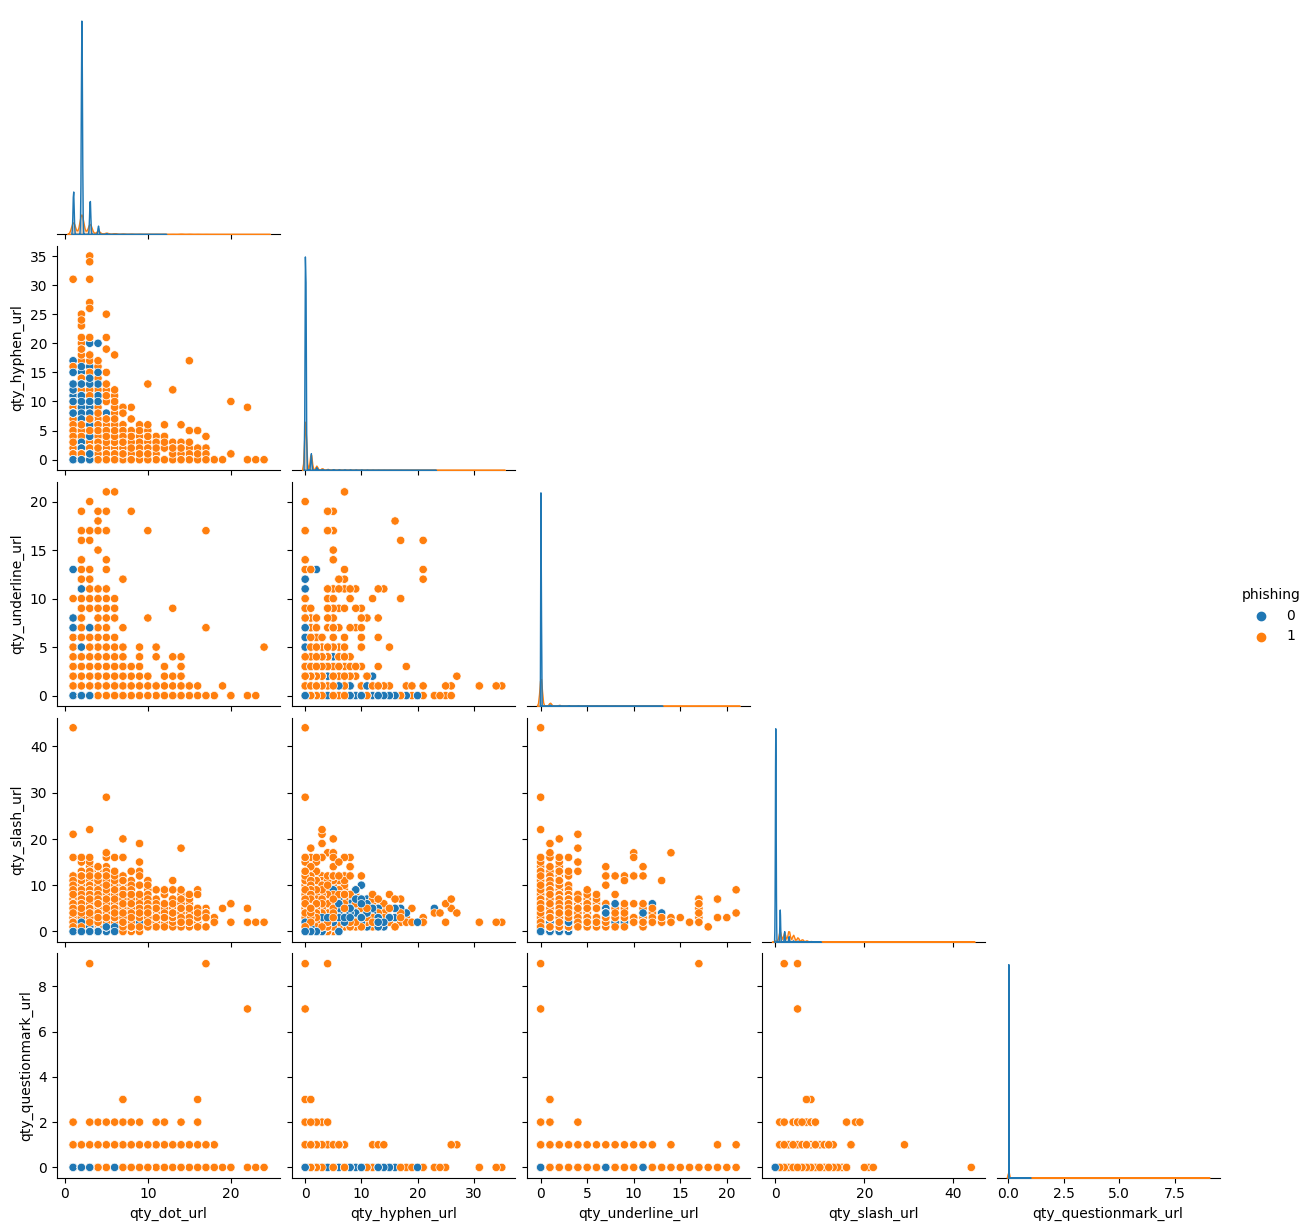

In [ ]:
df = data[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url','qty_slash_url','qty_questionmark_url','phishing']]
sns.pairplot(data = df,hue="phishing",corner=True);

In [8]:
import matplotlib.pyplot as plt

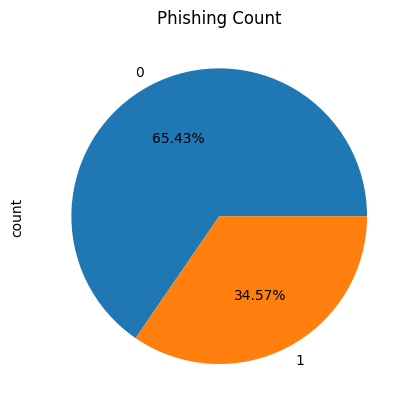

In [ ]:
data['phishing'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## Dependent And Independent Variable X and Y

In [5]:
y = data['phishing']

In [10]:
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 88647, dtype: int64

In [6]:
x = data.drop('phishing',axis=1)

In [12]:
x

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,334,1,3,1,3597,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,431,1,2,2,591,0,2,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,712,1,2,5,14391,1,0,0,0,0
88645,2,0,0,1,0,0,0,0,0,0,...,-1,1,1,1,52,1,0,0,0,0


# Model Training 
1.RandomForestClassifier
2.Logistic
3.Naive Byes
4.GradientBoostingClassifier
5.AdaBoostClassifier

1. Split the Training And Testing Model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=48)

2.Use Algorithm For Model Training

In [9]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

1. RanDomForest: 

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [18]:
rf=RandomForestClassifier()

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred=rf.predict(x_test)

In [35]:
## Now check Accurecy 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,r2_score 

In [32]:
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.9694522155040158
0.955990378989794
0.9604859251518516
0.9515367195082498
0.865489291372638


 2. Logistic Regression
 
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [14]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred1 = lr.predict(x_test)

In [18]:
print(accuracy_score(y_pred1,y_test))
print(f1_score(y_pred1,y_test))
print(precision_score(y_pred1,y_test))
print(recall_score(y_pred1,y_test))
print(r2_score(y_pred1,y_test))

0.9104097103149535
0.8672128406620967
0.8469074521585788
0.8885158284226394
0.594333091745586


Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [20]:
nv =GaussianNB()
nv.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred2 = nv.predict(x_test)

In [22]:
print(accuracy_score(y_pred2,y_test))
print(f1_score(y_pred2,y_test))
print(precision_score(y_pred2,y_test))
print(recall_score(y_pred2,y_test))
print(r2_score(y_pred2,y_test))

0.8456817976716903
0.7400228050171037
0.6358173861929332
0.8850804618601691
0.17287397128853055


Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off. Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

In [23]:
gf = GradientBoostingClassifier()

In [24]:
gf.fit(x_train,y_train)

GradientBoostingClassifier()

In [25]:
y_pred3 = gf.predict(x_test)

In [26]:
print(accuracy_score(y_pred3,y_test))
print(f1_score(y_pred3,y_test))
print(precision_score(y_pred3,y_test))
print(recall_score(y_pred3,y_test))
print(r2_score(y_pred3,y_test))

0.9540429564118762
0.9337367034253927
0.937365292926654
0.9301360985093973
0.7974853803346991


AdaBoostclassifier

In [23]:
ad = AdaBoostClassifier()

In [24]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [25]:
y_pred4=ad.predict(x_test)

In [36]:
print(accuracy_score(y_pred4,y_test))
print(f1_score(y_pred4,y_test))
print(precision_score(y_pred4,y_test))
print(recall_score(y_pred4,y_test))
print(r2_score(y_pred4,y_test))





0.9379568630989983
0.9103475255917064
0.9118934099666907
0.9088068736574888
0.7260432182033615


3.Comparision Model 

In [56]:
result ={"Model":pd.Series(["Rendomforest","LogisticRegression","Neive Byes","GradientBoostingClassifier","AdaBoostClassifier"]),
         "accuracy":pd.Series([0.97,0.91,0.85,0.96,0.94]),
         "F1_score":pd.Series([0.95,0.87,0.74,0.93,0.91]),
         "Precision":pd.Series([0.96,0.85,0.64,0.94,0.91]),
         "Recall":pd.Series([0.95,0.89,0.88,0.93,0.90]),
         "R2_score":pd.Series([0.87,0.59,0.17,0.80,0.73])
         
}
ResultDF=pd.DataFrame(result)

In [57]:
ResultDF

,Model,accuracy,F1_score,Precision,Recall,R2_score
0,Rendomforest,0.97,0.95,0.96,0.95,0.87
1,LogisticRegression,0.91,0.87,0.85,0.89,0.59
2,Neive Byes,0.85,0.74,0.64,0.88,0.17
3,GradientBoostingClassifier,0.96,0.93,0.94,0.93,0.80
4,AdaBoostClassifier,0.94,0.91,0.91,0.90,0.73


Best Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [20]:
import pickle 

In [22]:
pickle.dump(rf, open('model.pkl', 'wb'))